# **Wing Setups**

In [1]:
## 
using Revise
using StaticArrays
using BenchmarkTools
using TimerOutputs
using ProfileView

## Custom packages
includet("../src/math_tools.jl")
includet("../src/FoilParametrization.jl")
using .FoilParametrization: read_foil, kulfan_CST, naca4
using .math_tools: linspace, tuparray, tupvector, columns
using AeroMDAO

##
using PlotlyJS

┌ Info: Precompiling AeroMDAO [ae1513eb-aba2-415b-9b88-80f66c7c7c76]
└ @ Base loading.jl:1278


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17210615928619861180\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-584581667696265944\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17210615928619861180\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4421892986307499188\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2745099054156705770\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4421892986307499188\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Wing Section Setup

In [2]:
foil = naca4((4,4,1,2))
num_secs = 3
foils = [ foil for i ∈ 1:num_secs ]

airfoils = Foil.(foils)
wing_chords = [0.18, 0.16, 0.08]
wing_twists = [2., 0., -2.]
wing_spans = [0.5, 0.5]
wing_dihedrals = [0., 11.3]
wing_sweeps = [1.14, 8.]

2-element Array{Float64,1}:
 1.14
 8.0

Wing Definition

In [3]:
wing_right = HalfWing(airfoils, wing_chords, wing_spans, wing_dihedrals, wing_sweeps, wing_twists)
wing = Wing(wing_right, wing_right)
print_info(wing)

Span: 1.980313001340794 m
Area: 0.2864512827704587 m²
MAC: 0.15126436781609195 m
Aspect Ratio: 13.690424233226077


Run Case

In [7]:
reset_timer!()

ρ = 1.225
ref = SVector(0.25 * mean_aerodynamic_chord(wing), 0., 0.)
Ω = SVector(0.0, 0.0, 0.0)
uniform = Freestream(10.0, 5.0, 0.0)
@time horseshoe_panels, camber_panels, horseshoes, Γs = solve_case(wing, uniform, Ω, ref, span_num = 10, chord_num = 5, print = true) 

print_timer();

Nearfield:
CL: 0.8347337742316467
CDi: 0.014012925269840212
CY: 1.8387105304064158e-17
L/D: 59.56884505965578
Cl: -3.167897922074702e-17
Cm: -0.21736680846745396
Cn: -3.4340737423593477e-18
p̄: -0.0
q̄: 0.0
r̄: 0.0

Farfield:
CL: 3.3005490226819503
CDi: -0.3048464654119825
CY: 2.2293322390379586e-18
L/D: -10.826922392626228
Cl: 0.0
Cm: -0.8251372556704876
Cn: 4.257136770321054e-20
p̄: -0.0
q̄: 0.0
r̄: 0.0
  0.633788 seconds (513.62 k allocations: 32.381 MiB, 1.99% gc time)
 ──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            750ms / 54.9%           32.9MiB / 64.4%    

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 Printing                   1    353ms  8

Plot

In [5]:
## Panel method: TO DO
wing_panels = mesh_wing(wing, 10, 5);
wing_coords = plot_panels(wing_panels)[:]
camber_coords = plot_panels(camber_panels)[:]
horseshoe_coords = plot_panels(horseshoe_panels)[:];

## Streamlines
reset_timer!()

@timeit "Computing Streamlines" streams = plot_streamlines.(streamlines(uniform, Ω, horseshoe_panels, horseshoes, Γs, 5, 100));

print_timer()

##
min_Γ, max_Γ = extrema(Γs)
Γ_range = -map(-, min_Γ, max_Γ)
norm_Γs = [ 2 * (Γ - min_Γ) / Γ_range - 1 for Γ ∈ Γs ]

 ──────────────────────────────────────────────────────────────────────────────
                                       Time                   Allocations      
                               ──────────────────────   ───────────────────────
       Tot / % measured:            4.61s / 98.8%           1.86GiB / 100%     

 Section               ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────────
 Computing Streamlines      1    4.56s   100%   4.56s   1.86GiB  100%   1.86GiB
   Iterating              200    4.26s  93.4%  21.3ms   1.83GiB  98.2%  9.35MiB
     Updating Velocity  20.0k    4.17s  91.5%   208μs   1.76GiB  94.7%  92.4KiB
       Sum Legs         4.00M    1.93s  42.4%   483ns    732MiB  38.4%     192B
       Bound Leg        4.00M    802ms  17.6%   201ns   1.01GiB  54.5%     272B
       Trailing Leg     4.00M    267ms  5.86%  66.8ns     0.00B  0.00%    0.00B
     Adding Streamline  20.0k   83.9ms 

5×40 Array{Float64,2}:
 -1.0       -0.919689  -0.818903  …  -0.818903  -0.919689  -1.0
 -0.738173  -0.573696  -0.416932     -0.416932  -0.573696  -0.738173
 -0.618024  -0.396273  -0.225252     -0.225252  -0.396273  -0.618024
 -0.75508   -0.619858  -0.514951     -0.514951  -0.619858  -0.75508
 -0.950653  -0.923403  -0.898799     -0.898799  -0.923403  -0.950653

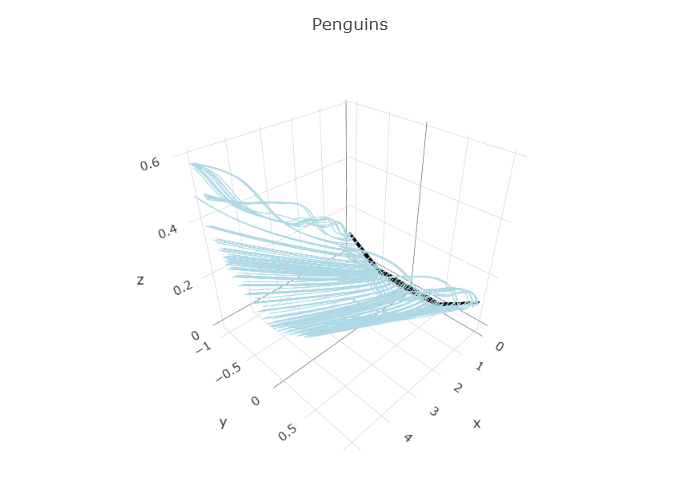

In [6]:
##
horse_xs = [ [ c[1] for c in panel ] for panel in horseshoe_coords ]
horse_ys = [ [ c[2] for c in panel ] for panel in horseshoe_coords ]
horse_zs = [ [ c[3] for c in panel ] for panel in horseshoe_coords ]

camber_xs = [ [ c[1] for c in panel ] for panel in camber_coords ]
camber_ys = [ [ c[2] for c in panel ] for panel in camber_coords ]
camber_zs = [ [ c[3] for c in panel ] for panel in camber_coords ]

streams_xs = [ [ c[1] for c in panel ] for panel in streams ]
streams_ys = [ [ c[2] for c in panel ] for panel in streams ]
streams_zs = [ [ c[3] for c in panel ] for panel in streams ];

##
layout = Layout(
                title = "Penguins",
                scene=attr(aspectmode="manual", aspectratio=attr(x=1,y=1,z=1)),
                zlim=(-0.1, 5.0)
                )

trace_horses = [ mesh3d(
                        x = x,
                        y = y,
                        z = z,
                        intensity = repeat([norm_Γ], length(x)),
                        text = norm_Γ,
                        showscale = false,
                        ) for (x, y, z, norm_Γ) in zip(horse_xs, horse_ys, horse_zs, norm_Γs) ]

trace_horsies = [ scatter3d(
                            x = x,
                            y = y,
                            z = z,
                            mode = :lines, 
                            line = attr(color = :black),
                            showlegend = false,
                            ) for (x, y, z) in zip(horse_xs, horse_ys, horse_zs) ]

trace_cambers = [ scatter3d(
                       x = x,
                       y = y,
                       z = z,
                       mode = :lines, 
                       line = attr(color = :black),
                       showlegend = false,
                       ) for (x, y, z) in zip(camber_xs, camber_ys, camber_zs) ]

trace_streams = [ scatter3d(
                            x = x, 
                            y = y, 
                            z = z, 
                            mode = :lines, 
                            line = attr(color = :lightblue),
                            showlegend = false,
                            ) for (x, y, z) in zip(streams_xs, streams_ys, streams_zs) ];

plot([ 
        [ trace for trace in trace_horses ]...,
        [ trace for trace in trace_horsies ]..., 
        [ trace for trace in trace_cambers ]...,
        [ trace for trace in trace_streams ]... 
     ], 
     layout)